In [1]:
import rdkit
from rdkit import Chem
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import rdkit.Chem.Lipinski as Lipinski

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from scipy import stats
import matplotlib.pyplot as plt
plt.rc('font', family='serif', size=14)
import seaborn as sns
import numpy as np
import pandas as pd

import os

csvs = [x for x in os.listdir("databases") if x.__contains__("csv")]
names = [x.split(".")[0] for x in csvs]


key_to_mol_a = {}
smi_a = [x for x in os.listdir("functional_groups/smis/") 
         if x.__contains__("smi") and x.__contains__("a_")]


key_to_smi = {}

for x in smi_a:
    f = open(os.path.join("functional_groups", "smis", x)).read()
    mol = rdkit.Chem.MolFromSmiles(f.split()[0])
    try:
        key_to_smi[x.split(".")[0]] = Chem.CanonSmiles(f.split()[0])
    except:
        key_to_smi[x.split(".")[0]] = None
        
    key_to_mol_a[x.split(".")[0]] = mol
    
DataFrames = {}
for name, csv in zip(names, csvs):
    print(name)
    DataFrames[name] = pd.read_csv(os.path.join("databases", csv))

RDKit ERROR: [15:43:44] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:43:44] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:43:45] Explicit valence for atom # 9 N, 4, is greater than permitted
RDKit ERROR: [15:43:45] Explicit valence for atom # 9 N, 4, is greater than permitted
RDKit ERROR: [15:43:45] Can't kekulize mol.  Unkekulized atoms: 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:43:45] Can't kekulize mol.  Unkekulized atoms: 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:43:45] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:43:45] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [15:43:45] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14
RDKit ERROR: 
RDKit ERROR: [15:43:45] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14
RDKit ERROR: 
RDKit ERROR: [15:43:45] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:43:45] Explicit v

ANIE_cleaned
QM9_cleaned_cleaned
PC9_o_cleaned_cleaned
ANI1
PC9_cleaned
PC9
ANI1x
PC9_o
PC9_o_cleaned
ANI1x_cleaned_cleaned
PC9_cleaned_cleaned
QM9_cleaned
QM9
ANIE_cleaned_cleaned
ANI1_cleaned_cleaned
ANI1x_cleaned
ANIE
ANI1_cleaned


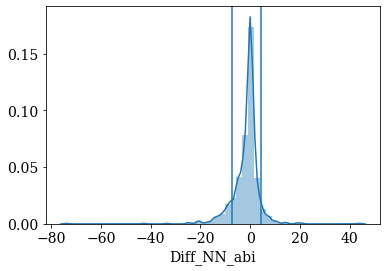

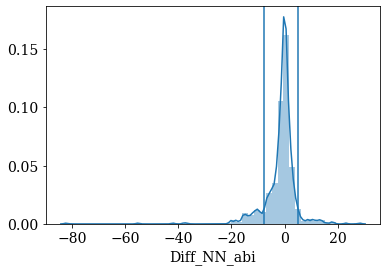

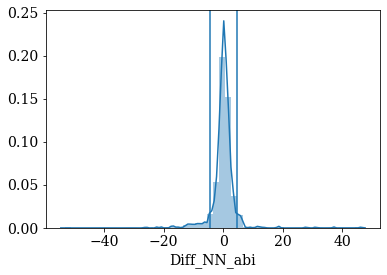

RDKit ERROR: [15:43:46] Explicit valence for atom # 1 N, 4, is greater than permitted


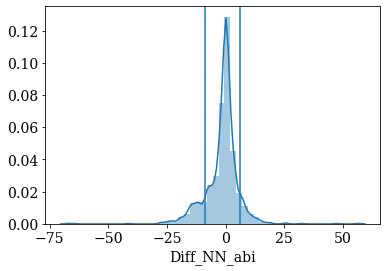

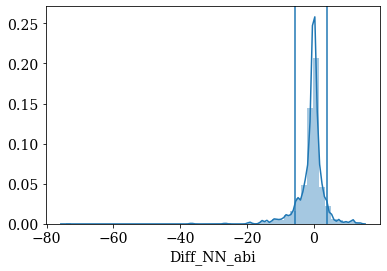

RDKit ERROR: [15:43:47] Explicit valence for atom # 1 N, 4, is greater than permitted


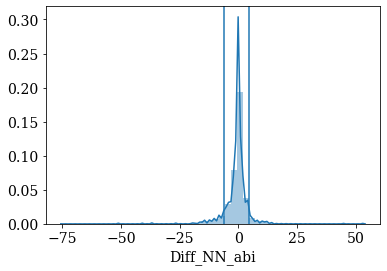

RDKit ERROR: [15:43:48] Explicit valence for atom # 1 N, 4, is greater than permitted


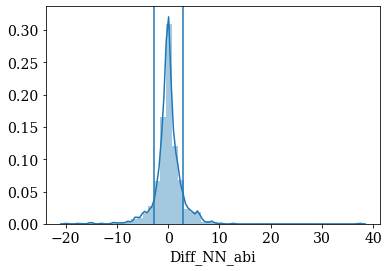

RDKit ERROR: [15:43:48] Explicit valence for atom # 1 N, 4, is greater than permitted


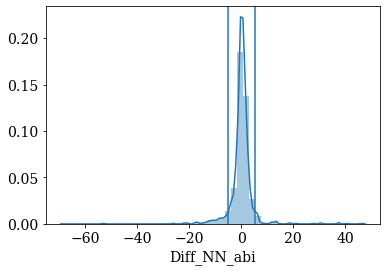

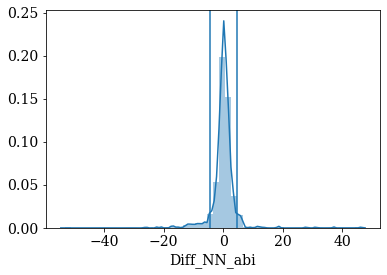

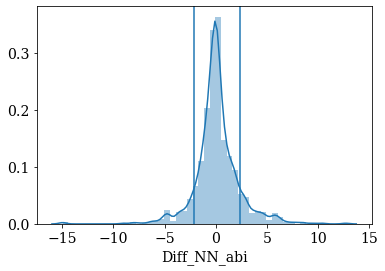

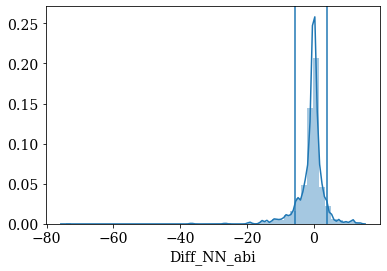

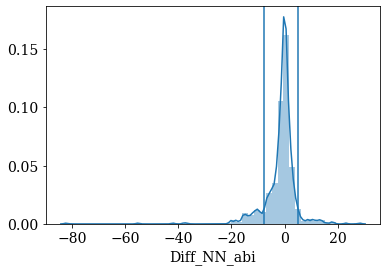

RDKit ERROR: [15:43:50] Explicit valence for atom # 1 N, 4, is greater than permitted


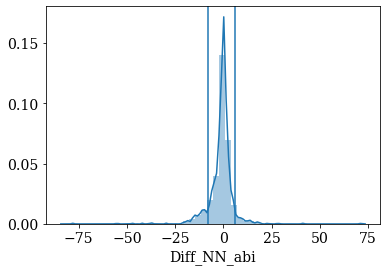

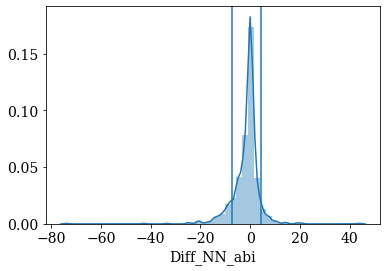

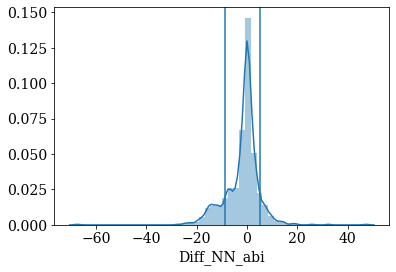

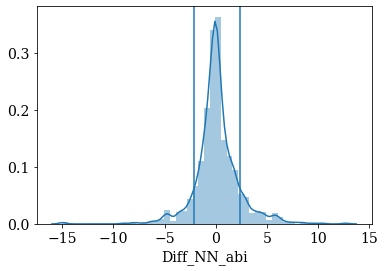

RDKit ERROR: [15:43:52] Explicit valence for atom # 1 N, 4, is greater than permitted


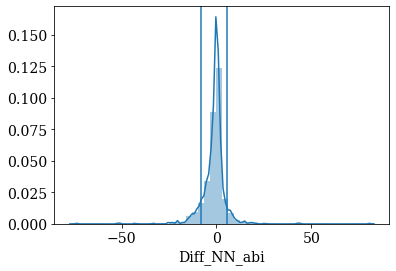

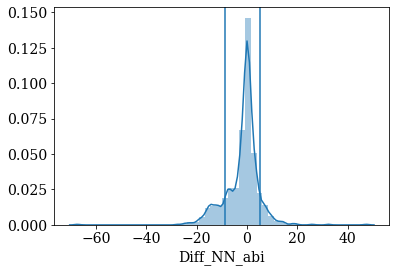

In [2]:

for dataset in DataFrames.keys():
    df = DataFrames[dataset]
    diff_NN_abi = df["Diff_NN_abi"]

    # how many standard deviations should we consider to be an "error"
    sd_multiple = 1 

    smiles_df = df["Smiles_A"]


    # More features for PCA analysis
    heavy_atoms = []
    NHOHs = []
    NOs = []
    H_acceptors = []
    H_donors = []
    rot_bonds = []
    arom_rings = []
    hetero_arom_rings = []
    rings = []
    keys = []

    def determine_class_error(difference):
        """
        Assigning class for Error vs Non-Error
        """
        threshold = sd_multiple*standard_dev
        if difference < (mean - threshold) or difference > (mean + threshold):
            return 1
        else:
            return 0

    def determine_class_over_under(difference):
        """DataFrames[dataset]
        Assigning class for over vs underprediction
        """
        threshold = sd_multiple*standard_dev
        if difference < (mean - threshold):
            return 1
        elif difference > (mean + threshold):
            return 0
        else:
            return None



    for smile in smiles_df:
        m = Chem.MolFromSmiles(smile)
        if m is not None:
            # Features for PCA
            heavy_atoms.append(Lipinski.HeavyAtomCount(m))
            NHOHs.append(Lipinski.NHOHCount(m))
            NOs.append(Lipinski.NOCount(m))
            arom_rings.append(Lipinski.NumAromaticCarbocycles(m))
            hetero_arom_rings.append(Lipinski.HeavyAtomCount(m))
            rings.append(Lipinski.RingCount(m))

            key = None
            canon_smile = Chem.CanonSmiles(smile)
            for i, value in key_to_smi.items():
                if value == canon_smile:
                    key = i
            keys.append(key)

        else:
            keys.append(None)
            heavy_atoms.append(None)
            NHOHs.append(None)
            NOs.append(None)
            arom_rings.append(None)
            hetero_arom_rings.append(None)
            rings.append(None)

    df = df.assign(key = keys)    
    df = df.assign(heavy_atoms = heavy_atoms)
    df = df.assign(NHOHs = NHOHs)
    df = df.assign(NOs = NOs)
    df = df.assign(hetero_arom_rings = hetero_arom_rings)
    df = df.assign(rings = rings)

    df = df.dropna()

    # Plot some basic statistics
    sns.distplot(diff_NN_abi)
    mean = np.mean(diff_NN_abi)
    standard_dev = np.std(diff_NN_abi)
    cutoff = mean + standard_dev*1
    plt.axvline(cutoff)
    cutoff = mean - standard_dev*1
    plt.axvline(cutoff)
    plt.show()
    #print(df["Diff_NN_abi"].describe(include='all'))

    df = df.set_index("key")
    DataFrames[dataset] = df
    df.to_csv(os.path.join("databases", "{}_cleaned.csv".format(dataset)))


In [9]:
mola = set(DataFrames["QM9"]["Smiles_A"].tolist())
molb = set(DataFrames["QM9"]["Smiles_B"].tolist())
all_smiles = mola | molb

f = open("database_smiles/tautobase_smiles", "w")

for i in list(all_smiles):
    f.write(i+"\n")
f.close()
    



In [25]:
master_PCA_features = df[["Unnamed: 0", "Smiles_A", "Diff_NN_abi", "heavy_atoms", "NHOHs", "NOs", "hetero_arom_rings", "rings"]]

def make_and_plot_PCA(features, colorby=None):
    """
    Function to make looking at the PCA cleaner
    
    features: a list of feature names (strings) in the master_PCA_features dataframe
    
    optional, colorby: a string of feature name in the master_PCA_features dataframe
    """

    PCA_features = df[features]


    pca = PCA(n_components=2)
    X = pca.fit(PCA_features)
    print(pca.explained_variance_ratio_)

    principalComponents = pca.fit_transform(PCA_features)

    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['PC1', 'PC2'])

    PCA_dataframe = pd.concat([master_PCA_features, principalDf], axis=1, sort=False)

    PCA_dataframe = PCA_dataframe.dropna()
    if colorby:
        plt.scatter(PCA_dataframe["PC1"], PCA_dataframe["PC2"], alpha=1, 
                c=PCA_dataframe[colorby], s=10, cmap="Reds")
    else:
        plt.scatter(PCA_dataframe["PC1"], PCA_dataframe["PC2"], alpha=1, 
                c=PCA_dataframe["Diff_NN_abi"])        
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    
    return plt.gca()



[0.92835958 0.04972457]


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

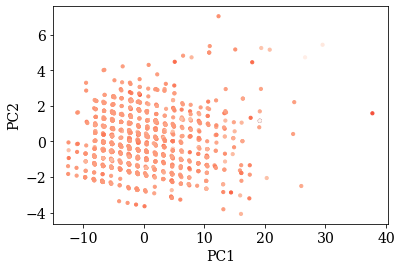

In [26]:
features = ["heavy_atoms", "NHOHs", "NOs", "hetero_arom_rings", "rings"]
make_and_plot_PCA(features, colorby="Diff_NN_abi")


[0.78689895 0.15244818]


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

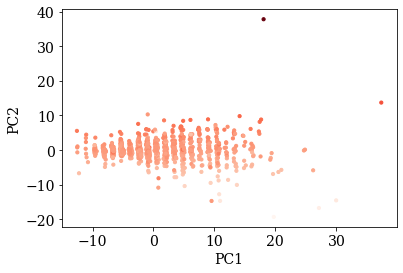

In [27]:
features2 = ["Diff_NN_abi", "heavy_atoms", "NHOHs", "NOs", "hetero_arom_rings", "rings"]
#make_and_plot_PCA(features2, colorby="heavy_atoms")
make_and_plot_PCA(features2, colorby="Diff_NN_abi")
